# Color-magnitude diagram for PS1/HST/SDSS sources

In this notebook we show the color-magnitude diagram (CMD; $g-r$ v.s. $r$) for sources from the PS1, HSTxPS1 and the SDSSxPS1.

The CMD clealy shows the bias in the SDSS test set; 
SDSS training set is completely different from typical sources in PS1 and 
there are few SDSS sources in the highest density regions of the PS1 CMD.

In [1]:
import sys,os,math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams["font.family"] = "sans-serif"
rcParams['font.sans-serif'] = ['DejaVu Sans']
from matplotlib import gridspec as grs
%matplotlib inline
from matplotlib import cm
from astropy.table import Table
import seaborn as sns
import statsmodels.nonparametric.api as smnp
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from statsmodels.nonparametric._kernel_base import EstimatorSettings
from scipy.special import expit
from scipy import stats

In [5]:
rand = Table.read('ra180_dec27_random_ztfstars.fit').to_pandas()
hst = Table.read("HST_training_with_colors_adamamiller.fit").to_pandas()
sdss = Table.read("MyTable_adamamiller.fit").to_pandas()

In [6]:
def kde_contour_dat(x, y, extent = 'Auto', bw_type = "silverman", grid_bins = 250, BW=False):
    """Determine normalized KDE PDF to draw contours"""
    
    if isinstance(x, pd.Series):
        x = x.values
    if isinstance(y, pd.Series):
        y = y.values
    
    if extent == 'Auto':
        extent = (x.min(), x.max(), y.min(), y.max())

    if bw_type == "silverman":
        bw = np.array([smnp.bandwidths.bw_silverman(x), smnp.bandwidths.bw_silverman(y)])
    elif bw_type == "scott":
        bw = np.array([smnp.bandwidths.bw_scott(x), smnp.bandwidths.bw_scott(y)])
    if BW:
        bw = BW
    
    settings = EstimatorSettings(n_jobs=-1)
    kde = KDEMultivariate([x,y], var_type='cc', bw = bw, defaults=settings)

    xi, yi = np.mgrid[extent[0]:extent[1]:grid_bins*1j,extent[2]:extent[3]:grid_bins*1j]

    kde_prob = kde.pdf(np.vstack([xi.flatten(), yi.flatten()]))

    zi = (kde_prob-kde_prob.min())/(kde_prob.max() - kde_prob.min())
    zi = zi.reshape(xi.shape)

    return xi, yi, zi

In [7]:
col1_rand = np.array(rand.gKronMag.values - rand.rKronMag.values, dtype=float)
col2_rand = np.array(rand.zKronMag.values - rand.yKronMag.values, dtype=float)
col1_hst = np.array(hst.gKronMag.values - hst.rKronMag.values, dtype=float)
col2_hst = np.array(hst.zKronMag.values - hst.yKronMag.values, dtype=float)
col1_sdss = np.array(sdss.gKronMag.values - sdss.rKronMag.values, dtype=float)
col2_sdss = np.array(sdss.zKronMag.values - sdss.yKronMag.values, dtype=float)
rMag_rand = np.array(rand.rKronMag.values, dtype=float)
rMag_hst = np.array(hst.rKronMag.values, dtype=float)
rMag_sdss = np.array(sdss.rKronMag.values, dtype=float)

In [8]:
DetMask_rand = np.logical_and(np.all((~np.isnan(rMag_rand), ~np.isnan(col1_rand), ~np.isnan(col2_rand)), axis=0), \
                              np.all((rand.gKronMag>0, rand.rKronMag>0, rand.iKronMag>0, rand.zKronMag>0, rand.yKronMag>0), axis=0))

DetMask_hst = np.logical_and(np.all((~np.isnan(rMag_hst), ~np.isnan(col1_hst), ~np.isnan(col2_hst)), axis=0), \
                              np.all((hst.gKronMag>0, hst.rKronMag>0, hst.iKronMag>0, hst.zKronMag>0, hst.yKronMag>0), axis=0))

DetMask_sdss = np.logical_and(np.all((~np.isnan(rMag_sdss), ~np.isnan(col1_sdss), ~np.isnan(col2_sdss)), axis=0), \
                              np.all((sdss.gKronMag>0, sdss.rKronMag>0, sdss.iKronMag>0, sdss.zKronMag>0, sdss.yKronMag>0), axis=0))

In [9]:
del rand, hst, sdss

col1_rand, col2_rand, rMag_rand= col1_rand[DetMask_rand], col2_rand[DetMask_rand], rMag_rand[DetMask_rand] 
col1_hst, col2_hst, rMag_hst= col1_hst[DetMask_hst], col2_hst[DetMask_hst], rMag_hst[DetMask_hst] 
col1_sdss, col2_sdss, rMag_sdss= col1_sdss[DetMask_sdss], col2_sdss[DetMask_sdss], rMag_sdss[DetMask_sdss] 

In [68]:
#mcol_rand_x, mcol_rand_y, mcol_rand_z = kde_contour_dat(col1_rand, rMag_rand, 
#                                                     grid_bins=200, extent=(-0.5, 2.5, 12, 25))

In [10]:
kde_mcol_rand = stats.gaussian_kde(col1_rand)
kde_rmag_rand = stats.gaussian_kde(rMag_rand)

In [69]:
#mcol_hst_x, mcol_hst_y, mcol_hst_z = kde_contour_dat(col1_hst, rMag_hst, 
#                                                     grid_bins=200, extent=(-0.5, 2.5, 12, 25))

In [11]:
kde_mcol_hst = stats.gaussian_kde(col1_hst)
kde_rmag_hst = stats.gaussian_kde(rMag_hst)

In [70]:
#mcol_sdss_x, mcol_sdss_y, mcol_sdss_z = kde_contour_dat(col1_sdss, rMag_sdss, 
#                                                     grid_bins=200, extent=(-0.5, 2.5, 12, 25))

In [12]:
kde_mcol_sdss = stats.gaussian_kde(col1_sdss)
kde_rmag_sdss = stats.gaussian_kde(rMag_sdss)

In [101]:
#pd.DataFrame(mcol_rand_x).to_csv('mcol_rand_x.csv', header=None, index=None)
#pd.DataFrame(mcol_rand_y).to_csv('mcol_rand_y.csv', header=None, index=None)
#pd.DataFrame(mcol_rand_z).to_csv('mcol_rand_z.csv', header=None, index=None)

#pd.DataFrame(mcol_hst_x).to_csv('mcol_hst_x.csv', header=None, index=None)
#pd.DataFrame(mcol_hst_y).to_csv('mcol_hst_y.csv', header=None, index=None)
#pd.DataFrame(mcol_hst_z).to_csv('mcol_hst_z.csv', header=None, index=None)

#pd.DataFrame(mcol_sdss_x).to_csv('mcol_sdss_x.csv', header=None, index=None)
#pd.DataFrame(mcol_sdss_y).to_csv('mcol_sdss_y.csv', header=None, index=None)
#pd.DataFrame(mcol_sdss_z).to_csv('mcol_sdss_z.csv', header=None, index=None)

In [15]:
mcol_rand_x = np.array(pd.read_csv('mcol_rand_x.csv', header=None))
mcol_rand_y = np.array(pd.read_csv('mcol_rand_y.csv', header=None))
mcol_rand_z = np.array(pd.read_csv('mcol_rand_z.csv', header=None))

mcol_hst_x = np.array(pd.read_csv('mcol_hst_x.csv', header=None))
mcol_hst_y = np.array(pd.read_csv('mcol_hst_y.csv', header=None))
mcol_hst_z = np.array(pd.read_csv('mcol_hst_z.csv', header=None))

mcol_sdss_x = np.array(pd.read_csv('mcol_sdss_x.csv', header=None))
mcol_sdss_y = np.array(pd.read_csv('mcol_sdss_y.csv', header=None))
mcol_sdss_z = np.array(pd.read_csv('mcol_sdss_z.csv', header=None))

In [18]:
xlims = [-0.25, 2.25]
ylims = [24, 14]

nx = (np.arange(xlims[0]-1, xlims[1]+1, 0.005))
ny = (np.arange(ylims[1]-1, ylims[0]+1, 0.005))

kde_mcol_rand_nx = kde_mcol_rand(nx)
kde_mcol_hst_nx = kde_mcol_hst(nx)
kde_mcol_sdss_nx = kde_mcol_sdss(nx)
kde_rmag_rand_ny = kde_rmag_rand(ny)
kde_rmag_hst_ny = kde_rmag_hst(ny)
kde_rmag_sdss_ny = kde_rmag_sdss(ny)

In [30]:
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.color_palette("Blues_d", 9).as_hex()[::-1])

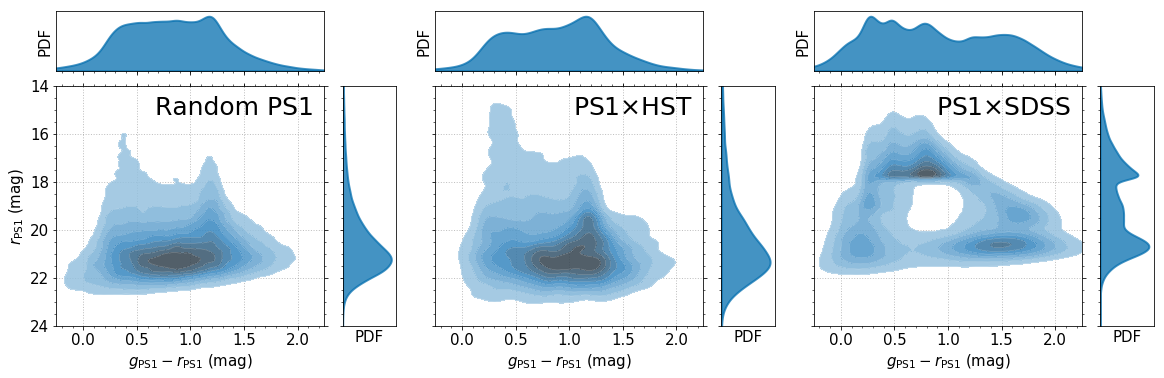

In [31]:
xlims = [-0.25, 2.25]
ylims = [24, 14]

origin = 'lower'
levels = np.arange(0.1, 1.1, 0.1)
nx = (np.arange(xlims[0]-1, xlims[1]+1, 0.005))
ny = (np.arange(ylims[1]-1, ylims[0]+1, 0.005))

gs = grs.GridSpec(2, 8, width_ratios=(5, 1, 0.05, 5, 1, 0.05, 5, 1), height_ratios=(1, 4))
plt.figure(figsize=(16, 5))
plt.subplots_adjust(wspace=0.15, hspace=0.1)
plt.subplots_adjust(bottom=0.12, top=0.995, right=0.9975, left=0.045)
ax = []
i = 0
for ind in range(16):
    ax.append(plt.subplot(gs[i, ind%8]))
    if ind%8==7:
        i += 1
        if i == 7: 
            break
            
###
ax[1].axis("off")
ax[2].axis("off")
ax[4].axis("off")
ax[5].axis("off")
ax[7].axis("off")
ax[10].axis("off")
ax[13].axis("off")
###            

#%%%
ax[0].fill_between(nx, kde_mcol_rand_nx, alpha=0.75, color=plt.get_cmap('PuBu')(0.75), lw=2)
ax[0].set_xlim(xlims)
ax[0].set_ylim(0, 1.1*np.max(kde_mcol_rand_nx))
ax[0].set_ylabel('PDF', fontsize=15)
ax[0].set_xticklabels( () )
ax[0].set_yticklabels( () )
ax[0].set_yticks([])
ax[0].minorticks_on()

ax[3].fill_between(nx, kde_mcol_hst_nx, alpha=0.75, color=plt.get_cmap('PuBu')(0.75), lw=2)
ax[3].set_xlim(xlims)
ax[3].set_ylim(0, 1.1*np.max(kde_mcol_hst_nx))
ax[3].set_ylabel('PDF', fontsize=15)
ax[3].set_xticklabels( () )
ax[3].set_yticklabels( () )
ax[3].set_yticks([])
ax[3].minorticks_on()

ax[6].fill_between(nx, kde_mcol_sdss_nx, alpha=0.75, color=plt.get_cmap('PuBu')(0.75), lw=2)
ax[6].set_xlim(xlims)
ax[6].set_ylim(0, 1.1*np.max(kde_mcol_sdss_nx))
ax[6].set_ylabel('PDF', fontsize=15)
ax[6].set_xticklabels( () )
ax[6].set_yticklabels( () )
ax[6].set_yticks([])
ax[6].minorticks_on()
#%%%

#%%%
ax[8].grid(alpha=0.5, lw=1, c='grey', linestyle=':') 
ax[8].tick_params(which="both", top=True, right=True)
ax[8].minorticks_on()
ax[8].set_axisbelow(True)

ax[8].contourf(mcol_rand_x, mcol_rand_y, mcol_rand_z, levels = levels,
             origin = origin,
             cmap = my_cmap , alpha = 0.85)
ax[8].contour(mcol_rand_x, mcol_rand_y, mcol_rand_z, levels = levels,
                    linewidths=(0.5,), origin = origin,
                    colors = ("w",), alpha = 0.5, zorder = 11)

ax[8].text(2.15, 14.9, 'Random PS1', ha = 'right', va = 'center', fontsize=25)

ax[8].set_xlim(xlims); ax[8].set_ylim(ylims)
ax[8].tick_params(labelsize = 15)
ax[8].set_xlabel(r'$g_\mathrm{PS1} - r_\mathrm{PS1}$ (mag)', fontsize=15)
ax[8].set_ylabel(r'$r_\mathrm{PS1}$ (mag)', fontsize=15)

ax[11].grid(alpha=0.5, lw=1, c='grey', linestyle=':') 
ax[11].tick_params(which="both", top=True, right=True)
ax[11].minorticks_on()
ax[11].set_axisbelow(True)

ax[11].contourf(mcol_hst_x, mcol_hst_y, mcol_hst_z, levels = levels,
             origin = origin,
             cmap = my_cmap , alpha = 0.85)
ax[11].contour(mcol_hst_x, mcol_hst_y, mcol_hst_z, levels = levels,
                    linewidths=(0.5,), origin = origin,
                    colors = ("w",), alpha = 0.5, zorder = 11)

ax[11].text(2.15, 14.9, r'PS1$\times$HST', ha = 'right', va = 'center', fontsize=25)

ax[11].set_xlim(xlims); ax[11].set_ylim(ylims)
ax[11].tick_params(labelsize = 15)
ax[11].set_yticklabels( () )
ax[11].set_xlabel(r'$g_\mathrm{PS1} - r_\mathrm{PS1}$ (mag)', fontsize=15)

ax[14].grid(alpha=0.5, lw=1, c='grey', linestyle=':') 
ax[14].tick_params(which="both", top=True, right=True)
ax[14].minorticks_on()
ax[14].set_axisbelow(True)

ax[14].contourf(mcol_sdss_x, mcol_sdss_y, mcol_sdss_z, levels = levels,
             origin = origin,
             cmap = my_cmap, alpha = 0.85)
ax[14].contour(mcol_sdss_x, mcol_sdss_y, mcol_sdss_z, levels = levels,
                    linewidths=(0.5,), origin = origin,
                    colors = ("w",), alpha = 0.5, zorder = 11)

ax[14].text(2.15, 14.9, r'PS1$\times$SDSS', ha = 'right', va = 'center', fontsize=25)

ax[14].set_xlim(xlims); ax[14].set_ylim(ylims)
ax[14].tick_params(labelsize = 15)
ax[14].set_yticklabels( () )
ax[14].set_xlabel(r'$g_\mathrm{PS1} - r_\mathrm{PS1}$ (mag)', fontsize=15)
#%%%

#%%%
ax[9].fill_betweenx(ny, kde_rmag_rand_ny, alpha=0.75, color=plt.get_cmap('PuBu')(0.75), lw=2)
ax[9].set_ylim(ylims)
ax[9].set_xlim(0, 1.1*np.max(kde_rmag_rand_ny))
ax[9].set_xlabel('PDF', fontsize=15)
ax[9].set_xticklabels( () )
ax[9].set_yticklabels( () )
ax[9].set_xticks([])
ax[9].minorticks_on()

ax[12].fill_betweenx(ny, kde_rmag_hst_ny, alpha=0.75, color=plt.get_cmap('PuBu')(0.75), lw=2)
ax[12].set_ylim(ylims)
ax[12].set_xlim(0, 1.1*np.max(kde_rmag_hst_ny))
ax[12].set_xlabel('PDF', fontsize=15)
ax[12].set_xticklabels( () )
ax[12].set_yticklabels( () )
ax[12].set_xticks([])
ax[12].minorticks_on()

ax[15].fill_betweenx(ny, kde_rmag_sdss_ny, alpha=0.75, color=plt.get_cmap('PuBu')(0.75), lw=2)
ax[15].set_ylim(ylims)
ax[15].set_xlim(0, 1.1*np.max(kde_rmag_sdss_ny))
ax[15].set_xlabel('PDF', fontsize=15)
ax[15].set_xticklabels( () )
ax[15].set_yticklabels( () )
ax[15].set_xticks([])
ax[15].minorticks_on()
#%%%
plt.savefig('ColorMagDiagram.pdf')
plt.show()
